### Scaling affects Gradient-based methods


Gradient-based methods (e.g., Logistic Regression, Linear Regression, Neural Networks) converge faster when features are on a similar scale.

If features have very different scales, gradients become imbalanced, leading to zig-zagging optimization paths.

Let's take linear regression as an example, ofc, if we use normal equation to solve it, scaling doesn't matter, but for gradient-based methods, yes.

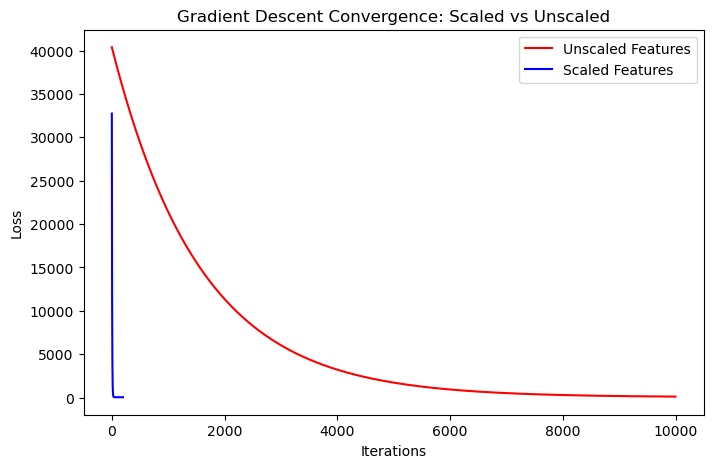

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Generate data
np.random.seed(42)
n_samples = 100
X = np.random.rand(n_samples, 2) * [1, 1000]   # Feature 1 small scale, Feature 2 big scale
true_theta = np.array([2, 0.5]) 
y = X @ true_theta + np.random.randn(n_samples) * 10 # y = 2X_1 + 0.5X_2 + noise


# Gradient Descent Implementation
def gradient_descent(X, y, lr=0.00001, n_iter=100, scale=False):
    if scale:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
    X_b = np.c_[np.ones((len(X), 1)), X]  # Add intercept
    theta = np.zeros(X_b.shape[1])
    history = []

    for _ in range(n_iter):
        gradient = - (1/len(X_b)) * X_b.T @ (y - X_b @ theta)
        theta = theta - lr * gradient
        loss = (1/(2*len(X_b))) * np.sum((y - X_b @ theta)**2)
        history.append(loss)
    return theta, history

# Run gradient descent
theta_unscaled, hist_unscaled = gradient_descent(X, y, lr=1e-9, n_iter=10000, scale=False)
theta_scaled, hist_scaled = gradient_descent(X, y, lr=0.1, n_iter=200, scale=True)

# Plot convergence
plt.figure(figsize=(8,5))
plt.plot(hist_unscaled, label="Unscaled Features", color="red")
plt.plot(hist_scaled, label="Scaled Features", color="blue")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Gradient Descent Convergence: Scaled vs Unscaled")
plt.legend()
plt.show()



With unscaled features, the algorithm still could converge in the end as long as the learning rate lr is sufficiently small (not causing overshoot),run it for enough iterations, cost function is convex (and it is, for linear regression). 



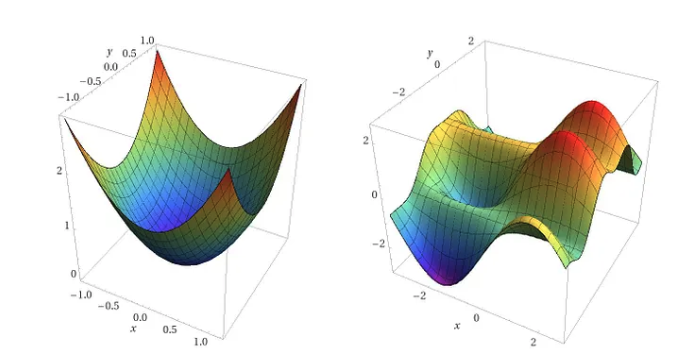

But without scaling, it takes many, many more iterations to get close to the minimum. We can try to modify the n_iter.

### Scaling affects distance-based methods
Algorithms like K-Nearest Neighbors (KNN) and Support Vector Machines (SVM) rely on distances (Euclidean, cosine, etc.). A feature with a larger scale will dominate the distance metric, biasing the model.

Feature X_plot: 
    proline   hue
0   1065.0  1.04
1   1050.0  1.05
2   1185.0  1.03
3   1480.0  0.86
4    735.0  1.04
5   1450.0  1.05
6   1290.0  1.02
7   1295.0  1.06
8   1045.0  1.08
9   1045.0  1.01


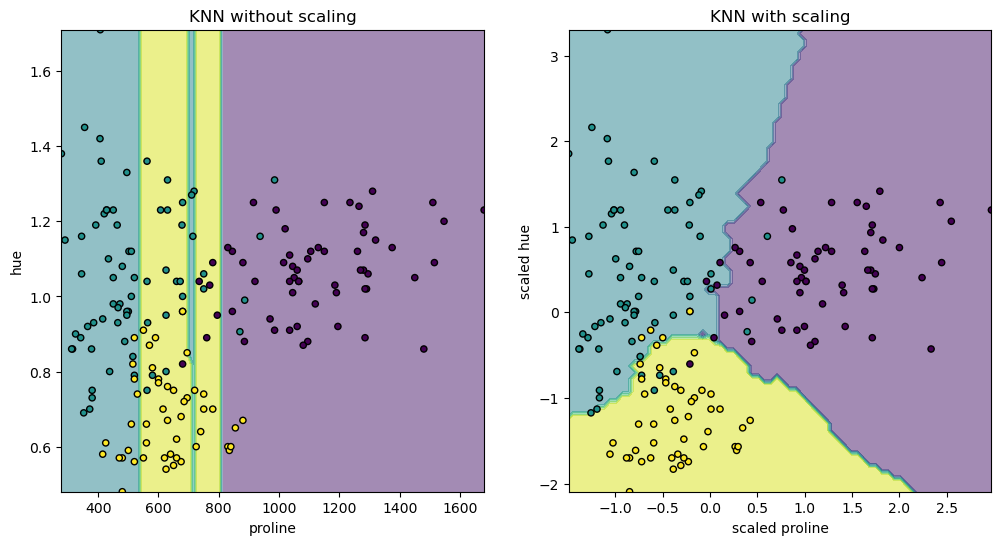

In [19]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = load_wine(return_X_y=True, as_frame=True)
scaler = StandardScaler().set_output(transform="pandas")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)
scaled_X_train = scaler.fit_transform(X_train)

X_plot = X[["proline", "hue"]]
print("Feature X_plot: \n", X_plot[:10])
X_plot_scaled = scaler.fit_transform(X_plot) # scaled using StandardScaler()
clf = KNeighborsClassifier(n_neighbors=20)


def fit_and_plot_model(X_plot, y, clf, ax):
    clf.fit(X_plot, y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_plot,
        response_method="predict",
        alpha=0.5,
        ax=ax,
    )
    disp.ax_.scatter(X_plot["proline"], X_plot["hue"], c=y, s=20, edgecolor="k")
    disp.ax_.set_xlim((X_plot["proline"].min(), X_plot["proline"].max()))
    disp.ax_.set_ylim((X_plot["hue"].min(), X_plot["hue"].max()))
    return disp.ax_


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

fit_and_plot_model(X_plot, y, clf, ax1)
ax1.set_title("KNN without scaling")

fit_and_plot_model(X_plot_scaled, y, clf, ax2)
ax2.set_xlabel("scaled proline")
ax2.set_ylabel("scaled hue")
_ = ax2.set_title("KNN with scaling")

distances between samples are mostly impacted by differences in values of “proline”, while values of the “hue” will be comparatively ignored.

### Scaling does not affect Tree-Based Models 

Decision Trees, Random Forests, and Gradient Boosted Trees are scale-invariant. They split based on thresholds so scaling doesn’t change the split logic.


### Comparison: StandardScaler(), MinMaxScaler(), RobustScaler()

**1. StandardScaler**  
$\[
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
\]$


---

**2. MinMaxScaler**  
$\[
X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
\]$  


---

**3. RobustScaler**  
$\[
X_{\text{scaled}} = \frac{X - \text{median}(X)}{\text{IQR}(X)}
\]$ 
where $\( \text{median}(X) \)$ is the median, and $\( \text{IQR}(X) = Q_3 - Q_1 \)$ is the interquartile range.


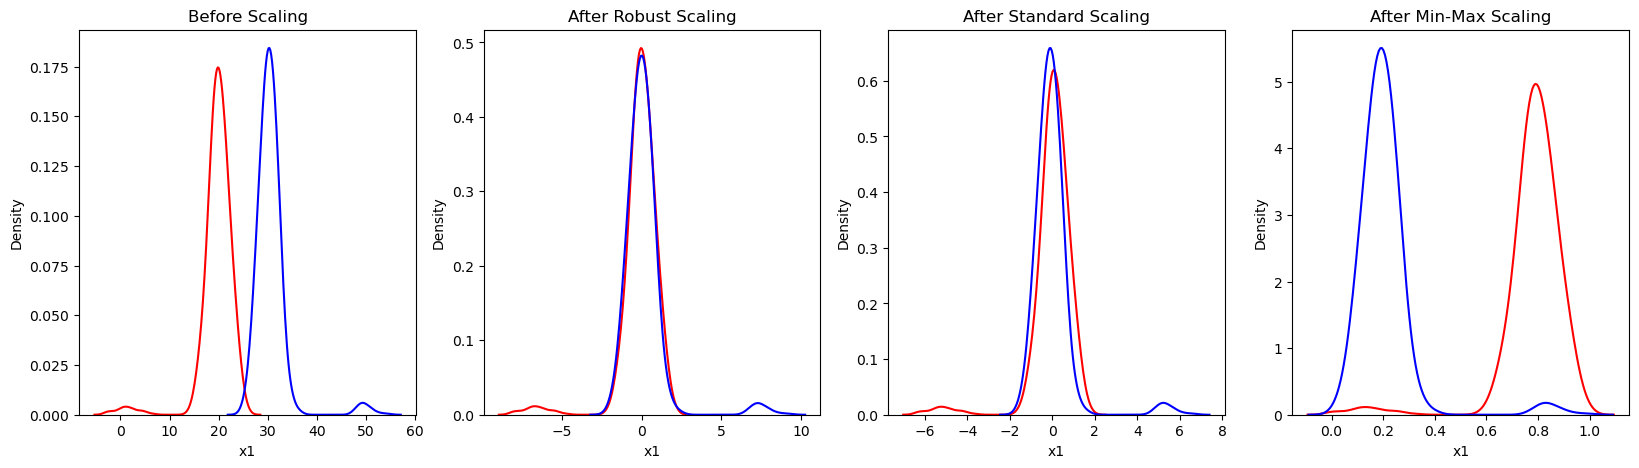

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 


x = pd.DataFrame({
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal




scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])


scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])


scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])


fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
sns.kdeplot(standard_df['x1'], ax = ax3, color ='red')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='blue')
ax4.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='red')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='blue')
plt.show()

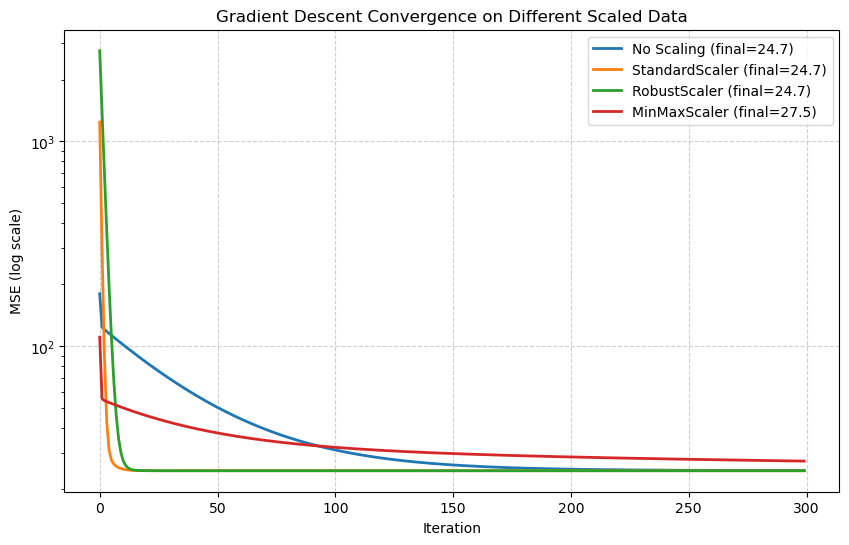

No Scaling      final theta = [0.07120495 2.97319849 0.50868069], final loss = 24.72
StandardScaler  final theta = [73.91205135 10.0716403   1.66325959], final loss = 24.68
RobustScaler    final theta = [74.82809393  7.92262349  1.23401155], final loss = 24.68
MinMaxScaler    final theta = [28.58315974 64.67371069 -2.95902773], final loss = 27.50


In [59]:



# True coefficients
true_theta = np.array([3.0, 0.5])
y = x.values @ true_theta + np.random.randn(len(x)) * 5  # add noise

# -------------------- define scalers --------------------
scalers = {
    "No Scaling": None,
    "StandardScaler": preprocessing.StandardScaler(),
    "RobustScaler": preprocessing.RobustScaler(),
    "MinMaxScaler": preprocessing.MinMaxScaler()
}

# -------------------- helper: gradient descent --------------------
def compute_safe_lr(X_b, safety=0.9):
    """Compute stable learning rate based on spectral norm."""
    svals = np.linalg.svd(X_b, compute_uv=False)
    sigma_max = svals[0]
    L = (2.0 / X_b.shape[0]) * (sigma_max ** 2)
    return float(safety / (L + 1e-12))

def gradient_descent(X, y, n_iter=300, lr=None):
    m = X.shape[0]
    X_b = np.hstack([np.ones((m,1)), X])  # add intercept
    if lr is None:
        lr = compute_safe_lr(X_b)
    theta = np.zeros(X_b.shape[1])
    losses = []
    for _ in range(n_iter):
        grad = -2/m * X_b.T.dot(y - X_b.dot(theta))
        theta -= lr * grad
        losses.append(np.mean((y - X_b.dot(theta))**2))
    return theta, losses, lr

# -------------------- run gradient descent for each scaler --------------------
results = {}
plt.figure(figsize=(10,6))
for label, scaler in scalers.items():
    Xs = x.values.copy() if scaler is None else scaler.fit_transform(x.values)
    theta, losses, lr = gradient_descent(Xs, y, n_iter=300)
    results[label] = dict(theta=theta, losses=losses, lr=lr)
    plt.plot(losses, label=f"{label} (final={losses[-1]:.1f})", linewidth=2)

plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("MSE (log scale)")
plt.title("Gradient Descent Convergence on Different Scaled Data")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

# -------------------- show final theta --------------------
for label, r in results.items():
    print(f"{label:15s} final theta = {r['theta']}, final loss = {r['losses'][-1]:.2f}")


*No Scaling*: slow convergence, because x1 and x2 are on very different scales and outliers dominate gradients.

*StandardScaler*: usually fastest and most stable, because features are zero-mean and unit variance.

*RobustScaler*: handles outliers well, slightly slower step if most points are already in a compact range.

*MinMaxScaler*: sensitive to extreme values — convergence may be slower if few outliers stretch the range.

check for more: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#results